###1. Importando bibliotecas e montando o Google Drive:

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Montando o Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


###2. Carregando e transformando o dataset:

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# salvando dataframe via excel
url = 'https://servicebus2.caixa.gov.br/portaldeloterias/api/resultados/download?modalidade=Lotofacil'
resultados = pd.read_excel(url)
resultados.head(2)

,Concurso,Data Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Bola7,Bola8,...,Rateio 13 acertos,Ganhadores 12 acertos,Rateio 12 acertos,Ganhadores 11 acertos,Rateio 11 acertos,Acumulado 15 acertos,Arrecadacao Total,Estimativa Prêmio,Acumulado sorteio especial Lotofácil da Independência,Observação
0,1,29/09/2003,2,3,5,6,9,10,11,13,...,"R$10,00",48807,"R$4,00",257593,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...
1,2,06/10/2003,1,4,5,6,7,9,11,12,...,"R$10,00",81252,"R$4,00",478188,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",ESTIMATIVA DE PRÊMIO PARA O PRÓXIMO CONCURSO (...


In [3]:
# limpando linhas que não são resultados de concurso
resultados['Concurso'] = resultados['Concurso'].astype(str)
resultados = resultados[resultados['Concurso'].str.contains(r'[0-9]{1,4}', na=False)]

# salvando em um excel
resultados.to_excel('resultados_lotofacil.xlsx', index=False)

resultados.head()


,Concurso,Data Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Bola7,Bola8,...,Rateio 13 acertos,Ganhadores 12 acertos,Rateio 12 acertos,Ganhadores 11 acertos,Rateio 11 acertos,Acumulado 15 acertos,Arrecadacao Total,Estimativa Prêmio,Acumulado sorteio especial Lotofácil da Independência,Observação
0,1,29/09/2003,2,3,5,6,9,10,11,13,...,"R$10,00",48807,"R$4,00",257593,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...
1,2,06/10/2003,1,4,5,6,7,9,11,12,...,"R$10,00",81252,"R$4,00",478188,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",ESTIMATIVA DE PRÊMIO PARA O PRÓXIMO CONCURSO (...
2,3,13/10/2003,1,4,6,7,8,9,10,11,...,"R$10,00",96244,"R$4,00",608211,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...
3,4,20/10/2003,1,2,4,5,8,10,12,13,...,"R$10,00",123912,"R$4,00",706657,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...
4,5,27/10/2003,1,2,4,8,9,11,12,13,...,"R$10,00",195636,"R$4,00",860992,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio para o próximo concurso (...


In [4]:
df = pd.read_excel('resultados_lotofacil.xlsx')
df['data_sorteio_conv'] = df.iloc[:,1]

df.data_sorteio_conv = pd.to_datetime(df.data_sorteio_conv)
df['day'] = df['data_sorteio_conv'].dt.day
df['month'] = df['data_sorteio_conv'].dt.month
df['year'] = df['data_sorteio_conv'].dt.year

# Visualizando os dados
df.head()

<ipython-input-4-2d8b09d90f58>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.data_sorteio_conv = pd.to_datetime(df.data_sorteio_conv)


,Concurso,Data Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Bola7,Bola8,...,Rateio 11 acertos,Acumulado 15 acertos,Arrecadacao Total,Estimativa Prêmio,Acumulado sorteio especial Lotofácil da Independência,Observação,data_sorteio_conv,day,month,year
0,1,29/09/2003,2,3,5,6,9,10,11,13,...,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...,2003-09-29,29,9,2003
1,2,06/10/2003,1,4,5,6,7,9,11,12,...,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",ESTIMATIVA DE PRÊMIO PARA O PRÓXIMO CONCURSO (...,2003-06-10,10,6,2003
2,3,13/10/2003,1,4,6,7,8,9,10,11,...,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...,2003-10-13,13,10,2003
3,4,20/10/2003,1,2,4,5,8,10,12,13,...,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...,2003-10-20,20,10,2003
4,5,27/10/2003,1,2,4,8,9,11,12,13,...,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio para o próximo concurso (...,2003-10-27,27,10,2003


###3.  Pré-processamento dos dados



<ipython-input-5-0665e7a6f5fd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nn.loc[df_nn['ganhadores 15 acertos'] > 0, 'ganhadores 15 acertos'] = 1


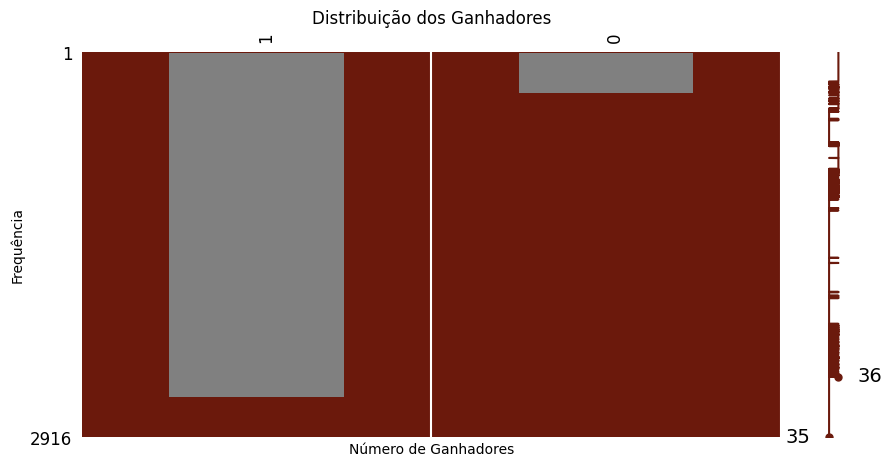

In [5]:
# Removendo valores nulos
df_clean = df.dropna(subset=['Concurso'])

# Removendo colunas irrelevantes
df_clean = df_clean.drop(['Cidade / UF'], axis=1)

# Visualizando o dataset limpo
msno.matrix(df_clean, figsize=(20, 5), color=(0.42, 0.1, 0.05))

# Selecionando as colunas relevantes para o modelo
df_nn = df_clean[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6', 'Bola7', 'Bola8', 'Bola9', 'Bola10',
                  'Bola11', 'Bola12', 'Bola13', 'Bola14', 'Bola15', 'Ganhadores 15 acertos']]

# Ajustando o nome das colunas
df_nn.columns = map(str.lower, df_nn.columns)

# Tratando os casos de múltiplos ganhadores
df_nn.loc[df_nn['ganhadores 15 acertos'] > 0, 'ganhadores 15 acertos'] = 1

# Verificando a distribuição dos ganhadores
df_nn['ganhadores 15 acertos'].value_counts().plot(kind='bar', figsize=(10, 5), color='gray', fontsize=12)
plt.title('Distribuição dos Ganhadores')
plt.xlabel('Número de Ganhadores')
plt.ylabel('Frequência')
plt.show()

# Dividindo o dataset em features e target
features = df_nn.iloc[:, 0:15]
target = df_nn.iloc[:, 15]

baseado no codigo que eu passe usando o algoritmo XGBoost , peço aprimore ele incluindo o modelo Fuzzy

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=8c1d45e863eb1278d47ce4fa91a1d1a73b3440be5cc003600fdb26218beeaebc
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
import xgboost as xgb
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_excel('resultados_lotofacil.xlsx')

# Define the range of numbers and the number of balls to draw
min_number = 1
max_number = 25
num_balls = 15

# Define the input and output variables for the Fuzzy model
input_numbers = ctrl.Antecedent(np.arange(min_number, max_number + 1, 1), 'input_numbers')
output_probabilities = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'output_probabilities')

# Define the membership functions for the input and output variables
input_numbers['low'] = fuzz.trimf(input_numbers.universe, [min_number, min_number, max_number//2])
input_numbers['medium'] = fuzz.trimf(input_numbers.universe, [min_number, max_number//2, max_number])
input_numbers['high'] = fuzz.trimf(input_numbers.universe, [max_number//2, max_number, max_number])
output_probabilities['low'] = fuzz.trimf(output_probabilities.universe, [0, 0, 0.5])
output_probabilities['medium'] = fuzz.trimf(output_probabilities.universe, [0, 0.5, 1])
output_probabilities['high'] = fuzz.trimf(output_probabilities.universe, [0.5, 1, 1])

# Define the rules for the Fuzzy model
rule1 = ctrl.Rule(input_numbers['low'], output_probabilities['low'])
rule2 = ctrl.Rule(input_numbers['medium'], output_probabilities['medium'])
rule3 = ctrl.Rule(input_numbers['high'], output_probabilities['high'])
fuzzy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Generate a list of random numbers
random_numbers = []
for i in range(num_balls):
    random_numbers.append(random.randint(min_number, max_number))

# Convert all numbers to integers
random_numbers = [int(number) for number in random_numbers]

# Sort the generated numbers
sorted_numbers = sorted(random_numbers)

# Print the generated numbers
print("Generated Numbers:")
for number in sorted_numbers:
    print(number)

# Calculate the probabilities for each number using the Fuzzy model
input_numbers_ctrl = ctrl.ControlSystemSimulation(fuzzy_ctrl)
output_probabilities_values = []
for number in sorted_numbers:
    input_numbers_ctrl.input['input_numbers'] = number
    input_numbers_ctrl.compute()
    output_probabilities_values.append(input_numbers_ctrl.output['output_probabilities'])

# Select the numbers with the highest probabilities for the next draw
indices_suggested = np.argsort(output_probabilities_values)[-10:]
numeros_sugeridos = [sorted_numbers[i] for i in indices_suggested]
probabilidades_sugeridas = [output_probabilities_values[i] for i in indices_suggested]

print("Números sugeridos para o próximo concurso:")
for i, (numero, probabilidade) in enumerate(zip(numeros_sugeridos, probabilidades_sugeridas)):
    print(f"Número {i+1}: {numero} - Probabilidade de acerto: {probabilidade * 100:.2f}%")

Generated Numbers:
6
7
9
10
11
11
11
14
14
14
16
18
19
21
25
Números sugeridos para o próximo concurso:
Número 1: 11 - Probabilidade de acerto: 49.58%
Número 2: 11 - Probabilidade de acerto: 49.58%
Número 3: 14 - Probabilidade de acerto: 50.72%
Número 4: 14 - Probabilidade de acerto: 50.72%
Número 5: 14 - Probabilidade de acerto: 50.72%
Número 6: 16 - Probabilidade de acerto: 52.40%
Número 7: 18 - Probabilidade de acerto: 55.10%
Número 8: 19 - Probabilidade de acerto: 57.00%
Número 9: 21 - Probabilidade de acerto: 62.14%
Número 10: 25 - Probabilidade de acerto: 83.33%


modelo XGBoost e Fuzzy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=8)

modelo_xgb = xgb.XGBClassifier()
modelo_xgb.fit(X_train, y_train)

input_numbers = ctrl.Antecedent(np.arange(1, 26, 1), 'input_numbers')
output_probabilities = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'output_probabilities')

input_numbers.automf(3)
output_probabilities.automf(3)

rule1 = ctrl.Rule(input_numbers['poor'], output_probabilities['poor'])
rule2 = ctrl.Rule(input_numbers['average'], output_probabilities['average'])
rule3 = ctrl.Rule(input_numbers['good'], output_probabilities['good'])

fuzzy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fuzzy_model = ctrl.ControlSystemSimulation(fuzzy_ctrl)

probabilidades_xgb = modelo_xgb.predict_proba(features)[:, 1]

output_probabilities_fuzzy = []
for row in features.values:
    row_probabilities = []
    for number in row:
        fuzzy_model.input['input_numbers'] = number
        fuzzy_model.compute()
        row_probabilities.append(fuzzy_model.output['output_probabilities'])
    output_probabilities_fuzzy.append(np.mean(row_probabilities))

peso_xgb = 0.5
peso_fuzzy = 0.5

probabilidades_ponderadas = (peso_xgb * np.array(probabilidades_xgb)) + (peso_fuzzy * np.array(output_probabilities_fuzzy))

indices_sugeridos = np.argsort(probabilidades_ponderadas)[-10:]
numeros_sugeridos = features.iloc[indices_sugeridos]
probabilidades_sugeridas = probabilidades_ponderadas[indices_sugeridos]

print("Números sugeridos para o próximo sorteio:")
for i, (numeros, probabilidade) in enumerate(zip(numeros_sugeridos.values, probabilidades_sugeridas)):
    print(f"Número {i+1}: {', '.join(map(str, numeros))} - Probabilidade de acerto: {probabilidade * 100:.2f}%")


Números sugeridos para o próximo sorteio:
Número 1: 5, 8, 9, 10, 11, 12, 13, 15, 18, 19, 20, 21, 22, 23, 24 - Probabilidade de acerto: 77.12%
Número 2: 2, 5, 8, 10, 11, 14, 15, 17, 18, 20, 21, 22, 23, 24, 25 - Probabilidade de acerto: 77.14%
Número 3: 5, 7, 8, 9, 10, 11, 13, 15, 17, 18, 20, 21, 22, 23, 25 - Probabilidade de acerto: 77.16%
Número 4: 2, 4, 7, 9, 10, 12, 13, 16, 18, 20, 21, 22, 23, 24, 25 - Probabilidade de acerto: 77.17%
Número 5: 2, 4, 6, 9, 12, 13, 15, 16, 19, 20, 21, 22, 23, 24, 25 - Probabilidade de acerto: 77.25%
Número 6: 3, 4, 6, 7, 10, 13, 17, 18, 19, 20, 21, 22, 23, 24, 25 - Probabilidade de acerto: 77.26%
Número 7: 2, 5, 6, 9, 11, 12, 14, 16, 19, 20, 21, 22, 23, 24, 25 - Probabilidade de acerto: 77.28%
Número 8: 6, 7, 9, 10, 11, 12, 13, 17, 18, 19, 20, 21, 22, 24, 25 - Probabilidade de acerto: 77.29%
Número 9: 5, 8, 9, 10, 11, 12, 13, 14, 18, 19, 20, 22, 23, 24, 25 - Probabilidade de acerto: 77.42%
Número 10: 4, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24

###Redes Neurais Profundas:

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.neural_network import MLPClassifier

# Algoritmo de Redes Neurais Profundas
dnn = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000)
dnn.fit(features, target)

# Transformando as features utilizando o modelo DNN
features_dnn = dnn.predict_proba(features)

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9',
                           'bola10', 'bola11', 'bola12', 'bola13', 'bola14', 'bola15']].values.tolist()

probabilidade_boa = 99
probabilidade_atual = 0

# Gera sequencia de numeros até que a probabilidade seja maior ou igual a 99%
while probabilidade_atual < probabilidade_boa:
    # Gera sequencia de números
    dezenas = random.sample(range(1, 26), 15)

    # Verifica se o número gerado já foi sorteado
    if dezenas not in dezenas_sorteadas:
        # Valida qual a probabilidade da sequência ser sorteada
        probabilidade_atual = int(dnn.predict_proba([dezenas])[0][1] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))

# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(dnn.predict_proba([dezenas_random])[0][1] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))


Probabilidade de 99% -> Dezenas: [2, 3, 5, 6, 7, 9, 14, 15, 16, 17, 21, 22, 23, 24, 25]
Probabilidade de 97% -> Dezenas: [1, 3, 4, 5, 12, 13, 14, 15, 17, 18, 19, 20, 22, 23, 25]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPCl

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

# Definindo os hiperparâmetros que você deseja otimizar
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=5)

# Treinando o modelo com diferentes combinações de hiperparâmetros
grid_search.fit(features, target)

# Imprimindo os melhores hiperparâmetros encontrados
print(grid_search.best_params_)

# Usando validação cruzada para uma estimativa mais robusta do desempenho do modelo
kf = KFold(n_splits=5)
auc_scores = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    dnn = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000)
    dnn.fit(X_train, y_train)

    predictions = dnn.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, predictions)
    auc_scores.append(auc)

print(f'Média AUC: {np.mean(auc_scores)}')

probabilidade_boa = 60
probabilidade_atual = 0

# Gera sequencia de numeros até que a probabilidade seja maior ou igual a 99%
while probabilidade_atual < probabilidade_boa:
    # Gera sequencia de números
    dezenas = random.sample(range(1, 26), 15)

    # Verifica se o número gerado já foi sorteado
    if dezenas not in dezenas_sorteadas:
        # Valida qual a probabilidade da sequência ser sorteada
        probabilidade_atual = int(dnn.predict_proba([dezenas])[0][1] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))

# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(dnn.predict_proba([dezenas_random])[0][1] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

# Criação de novas features
for i in range(1, 6):
    df_nn[f'mais_sorteados_{i}'] = df_nn.iloc[:, 0:15].rolling(window=5).apply(lambda x: x.value_counts().index[0])[i-1]

# Agora você pode incluir essas novas features no seu modelo
features = df_nn[['mais_sorteados_1', 'mais_sorteados_2', 'mais_sorteados_3', 'mais_sorteados_4', 'mais_sorteados_5', 'bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9',
                  'bola10', 'bola11', 'bola12', 'bola13', 'bola14', 'bola15']]

# Definindo os hiperparâmetros que você deseja otimizar
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=5)

# Treinando o modelo com diferentes combinações de hiperparâmetros
grid_search.fit(features, target)

# Imprimindo os melhores hiperparâmetros encontrados
print(grid_search.best_params_)

# Usando validação cruzada para uma estimativa mais robusta do desempenho do modelo
kf = KFold(n_splits=5)
auc_scores = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    dnn = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000)
    dnn.fit(X_train, y_train)

    predictions = dnn.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, predictions)
    auc_scores.append(auc)

print(f'Média AUC: {np.mean(auc_scores)}')

probabilidade_boa = 60
probabilidade_atual = 0

# Gera sequencia de numeros até que a probabilidade seja maior ou igual a 99%
while probabilidade_atual < probabilidade_boa:
    # Gera sequencia de números
    dezenas = random.sample(range(1, 26), 15)

    # Verifica se o número gerado já foi sorteado
    if dezenas not in dezenas_sorteadas:
        # Valida qual a probabilidade da sequência ser sorteada
        probabilidade_atual = int(dnn.predict_proba([dezenas])[0][1] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))

# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(dnn.predict_proba([dezenas_random])[0][1] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))


KeyError: ignored

Gradient Boosting LightGBM

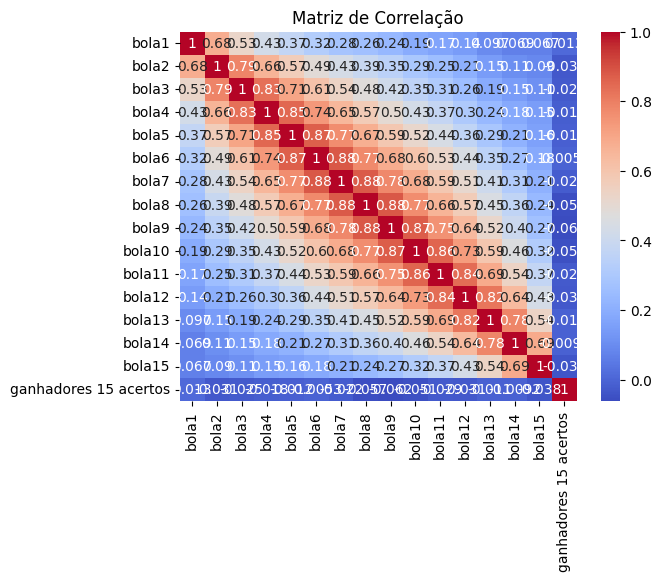

[LightGBM] [Info] Number of positive: 1731, number of negative: 217
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 1948, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.888604 -> initscore=2.076557
[LightGBM] [Info] Start training from score 2.076557
Acurácia do modelo: 0.890625
Probabilidade de 99% -> Dezenas: [1, 2, 3, 6, 7, 8, 9, 10, 12, 13, 14, 15, 18, 19, 21]
Probabilidade de 95% -> Dezenas: [1, 3, 6, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 22, 23]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Algoritmo Análise de Correlação
correlation_matrix = df_nn.corr()

# Plotar o mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlação')
plt.show()

# Separando target e classes
features = df_nn.iloc[:, 0:15]
target = df_nn.iloc[:, 15]

# Dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=8)

# Criando modelo LightGBM
modelo = lgb.LGBMClassifier()

# Treinando modelo
modelo.fit(X_train, y_train)

# Avaliando modelo
accuracy = modelo.score(X_test, y_test)
print("Acurácia do modelo:", accuracy)

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[
    ['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9', 'bola10', 'bola11', 'bola12',
     'bola13', 'bola14', 'bola15']].values.tolist()

probabilidade_boa = 99
probabilidade_atual = 0

# Gera sequencia de numeros até que a probabilidade seja maior ou igual a 99%
while probabilidade_atual < probabilidade_boa:
    # Gera sequencia de números
    dezenas = random.sample(range(1, 26), 15)

    # Verifica se o número gerado já foi sorteado
    if dezenas not in dezenas_sorteadas:
        # Valida qual a probabilidade da sequência ser sorteada
        probabilidade_atual = int(modelo.predict_proba([dezenas])[0][1] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))

# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(modelo.predict_proba([dezenas_random])[0][1] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))

modelo XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Remover valores nulos e colunas irrelevantes
df_clean = df.dropna(subset=['Concurso'])
df_clean = df_clean.drop(['Cidade / UF'], axis=1)

# Selecionar as colunas relevantes para o modelo
df_nn = df_clean[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6', 'Bola7', 'Bola8', 'Bola9', 'Bola10',
                  'Bola11', 'Bola12', 'Bola13', 'Bola14', 'Bola15', 'Ganhadores 15 acertos']]

# Ajustar o nome das colunas
df_nn.columns = map(str.lower, df_nn.columns)

# Tratar os casos de múltiplos ganhadores
df_nn.loc[df_nn['ganhadores 15 acertos'] > 0, 'ganhadores 15 acertos'] = 1

# Dividir o dataset em features e target
features = df_nn.iloc[:, 0:15]
target = df_nn.iloc[:, 15]

# Dividir o dataset em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=8)

# Criar o modelo XGBoost
modelo = xgb.XGBClassifier()

# Treinar o modelo
modelo.fit(X_train, y_train)

# Avaliar o modelo
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo: %.2f%%" % (accuracy * 100))

# Gerar números com o modelo treinado
probabilidades = modelo.predict_proba(features)[:, 1]

# Selecionar os números com as maiores probabilidades para o próximo concurso
indices_sugeridos = np.argsort(probabilidades)[-10:]
numeros_sugeridos = features.iloc[indices_sugeridos]
probabilidades_sugeridas = probabilidades[indices_sugeridos]

print("Números sugeridos para o próximo concurso:")
for i, (numeros, probabilidade) in enumerate(zip(numeros_sugeridos.values, probabilidades_sugeridas)):
    print(f"Número {i+1}: {', '.join(map(str, numeros))} - Probabilidade de acerto: {probabilidade * 100:.2f}%")


<ipython-input-12-12e53ed26adb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nn.loc[df_nn['ganhadores 15 acertos'] > 0, 'ganhadores 15 acertos'] = 1


Acurácia do modelo: 88.02%
Números sugeridos para o próximo concurso:
Número 1: 5, 7, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23 - Probabilidade de acerto: 99.95%
Número 2: 5, 7, 8, 9, 10, 11, 13, 14, 16, 17, 19, 20, 21, 22, 23 - Probabilidade de acerto: 99.95%
Número 3: 1, 2, 3, 5, 9, 10, 11, 12, 13, 15, 20, 21, 23, 24, 25 - Probabilidade de acerto: 99.95%
Número 4: 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 20, 22, 23, 25 - Probabilidade de acerto: 99.95%
Número 5: 1, 2, 3, 4, 7, 8, 9, 10, 11, 13, 14, 20, 23, 24, 25 - Probabilidade de acerto: 99.95%
Número 6: 2, 3, 4, 8, 9, 10, 11, 14, 17, 20, 21, 22, 23, 24, 25 - Probabilidade de acerto: 99.96%
Número 7: 2, 4, 5, 7, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 22 - Probabilidade de acerto: 99.96%
Número 8: 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 18, 20, 21, 22 - Probabilidade de acerto: 99.96%
Número 9: 1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 17, 18, 21, 22, 24 - Probabilidade de acerto: 99.97%
Número 10: 2, 4, 5, 6, 7, 9, 10, 11, 12, 17, 18, 

Análise de Distribuição de Soluções: Pode ser utilizada para analisar a distribuição das soluções encontradas pelo algoritmo genético. Isso pode envolver a criação de histogramas ou gráficos de densidade para visualizar a frequência ou a probabilidade de ocorrência de diferentes soluções.

Epoch 1/100
195/195 [==============================] - 3s 4ms/step - loss: 0.4311 - accuracy: 0.8747 - val_loss: 0.3145 - val_accuracy: 0.9083
Epoch 2/100
195/195 [==============================] - 1s 6ms/step - loss: 0.3795 - accuracy: 0.8886 - val_loss: 0.3237 - val_accuracy: 0.9083
Epoch 3/100
195/195 [==============================] - 1s 4ms/step - loss: 0.3690 - accuracy: 0.8886 - val_loss: 0.3126 - val_accuracy: 0.9083
Epoch 4/100
195/195 [==============================] - 1s 4ms/step - loss: 0.3668 - accuracy: 0.8886 - val_loss: 0.3123 - val_accuracy: 0.9083
Epoch 5/100
195/195 [==============================] - 1s 5ms/step - loss: 0.3691 - accuracy: 0.8886 - val_loss: 0.3068 - val_accuracy: 0.9083
Epoch 6/100
195/195 [==============================] - 1s 5ms/step - loss: 0.3579 - accuracy: 0.8886 - val_loss: 0.3096 - val_accuracy: 0.9083
Epoch 7/100
195/195 [==============================] - 1s 4ms/step - loss: 0.3582 - accuracy: 0.8886 - val_loss: 0.3069 - val_accuracy: 0.9083

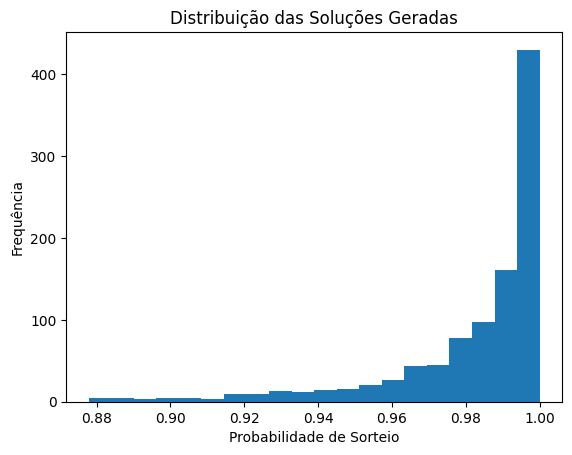

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

np.random.seed(8)

# Separando target e classes
features = df_nn.iloc[:, 0:15]
target = df_nn.iloc[:, 15]

# Dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=8)

# Criando modelo
modelo = Sequential()
modelo.add(Dense(32, input_dim=15, activation='relu'))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando modelo
modelo.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Avaliando modelo
scores = modelo.evaluate(X_test, y_test)
print("\nAcuracia do modelo")
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[
    ['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9', 'bola10', 'bola11', 'bola12',
     'bola13', 'bola14', 'bola15']].values.tolist()

probabilidade_boa = 95
probabilidade_atual = 0

# Gera sequencia de numeros até que a probabilidade seja maior ou igual a 99%
while probabilidade_atual < probabilidade_boa:
    # Gera sequencia de números
    dezenas = random.sample(range(1, 26), 15)

    # Verifica se o número gerado já foi sorteado
    if dezenas not in dezenas_sorteadas:
        # Valida qual a probabilidade da sequência ser sorteada
        probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas]))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))

# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas_random]))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))
# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas_random]))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))

# Algoritmo Análise de Distribuição de Soluções
# Gera um conjunto de soluções aleatórias
num_solucoes = 1000
solucoes = []
for _ in range(num_solucoes):
    dezenas_random = random.sample(range(1, 26), 15)
    solucoes.append(dezenas_random)

# Calcula as probabilidades de cada solução ser sorteada
probabilidades = modelo.predict(pd.DataFrame(solucoes))

# Plota o histograma das probabilidades de sorteio
plt.hist(probabilidades, bins=20)
plt.xlabel('Probabilidade de Sorteio')
plt.ylabel('Frequência')
plt.title('Distribuição das Soluções Geradas')
plt.show()


Aprendizado de maquina

<ipython-input-14-afa2d7a41e68>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nn.loc[df_nn['ganhadores 15 acertos'] > 0, 'ganhadores 15 acertos'] = 1


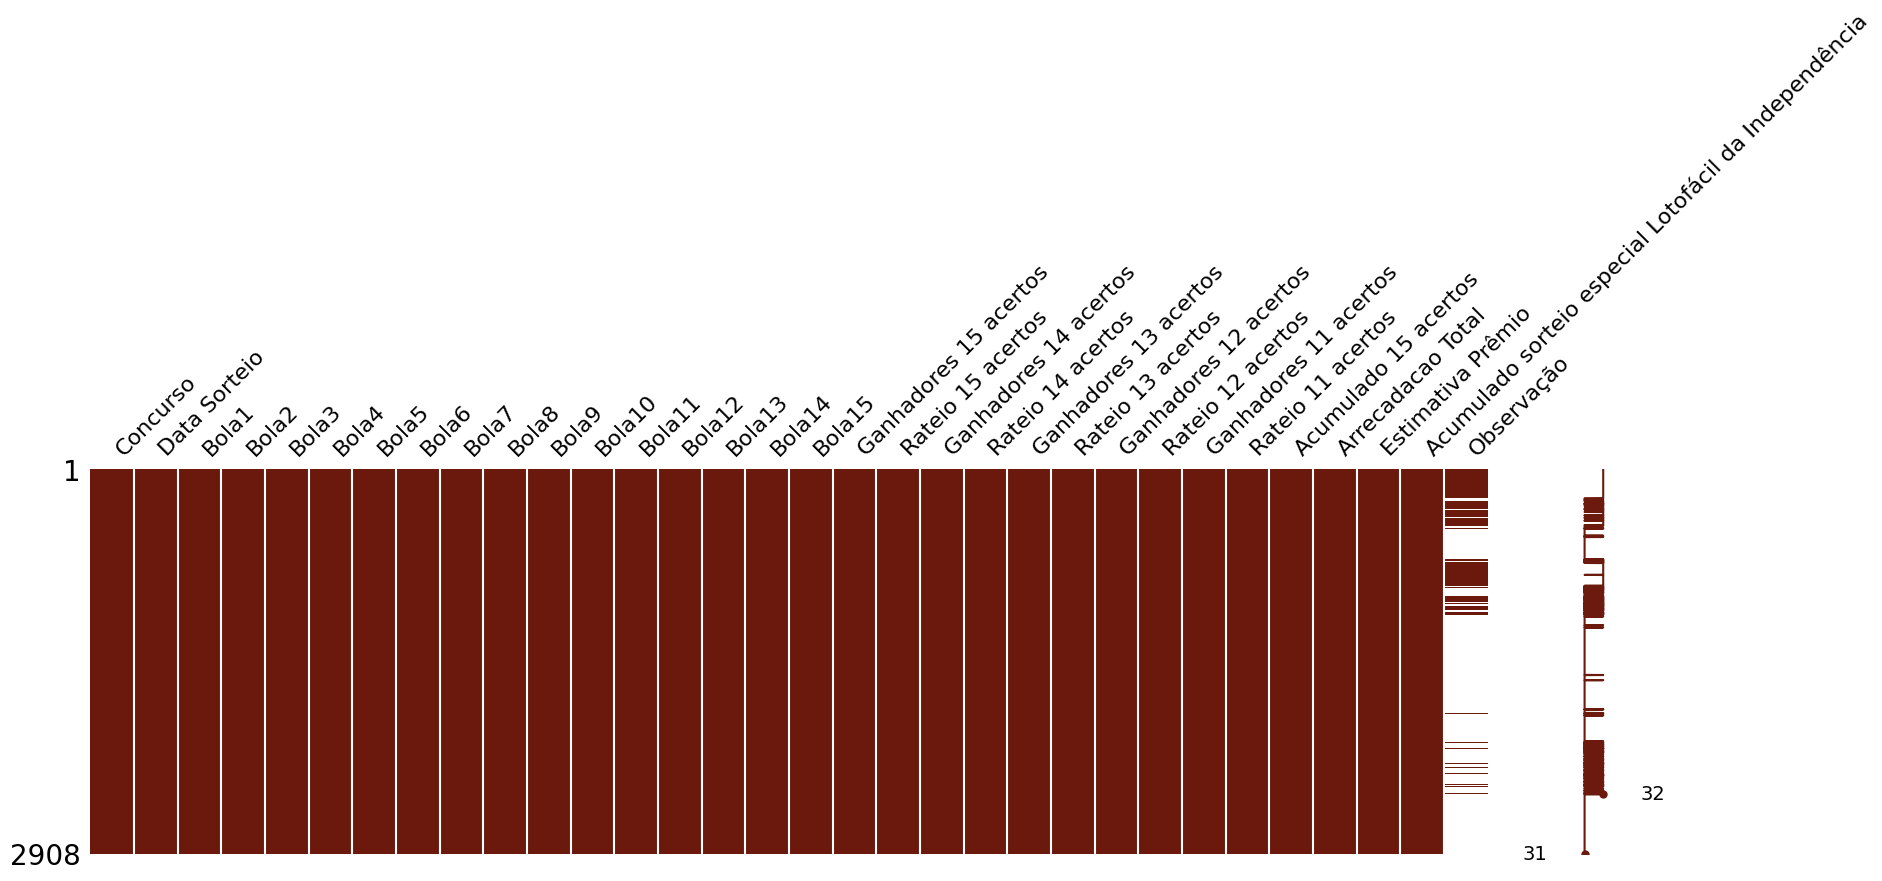

Epoch 1/200
195/195 [==============================] - 2s 4ms/step - loss: 0.7636 - accuracy: 0.8291 - val_loss: 0.3062 - val_accuracy: 0.9083
Epoch 2/200
195/195 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8824 - val_loss: 0.3276 - val_accuracy: 0.9083
Epoch 3/200
195/195 [==============================] - 1s 3ms/step - loss: 0.3875 - accuracy: 0.8871 - val_loss: 0.3296 - val_accuracy: 0.9083
Epoch 4/200
195/195 [==============================] - 1s 3ms/step - loss: 0.3701 - accuracy: 0.8886 - val_loss: 0.3159 - val_accuracy: 0.9083
Epoch 5/200
195/195 [==============================] - 1s 3ms/step - loss: 0.3660 - accuracy: 0.8886 - val_loss: 0.3226 - val_accuracy: 0.9083
Epoch 6/200
195/195 [==============================] - 1s 3ms/step - loss: 0.3673 - accuracy: 0.8886 - val_loss: 0.3042 - val_accuracy: 0.9083
Epoch 7/200
195/195 [==============================] - 1s 5ms/step - loss: 0.3694 - accuracy: 0.8881 - val_loss: 0.3049 - val_accuracy: 0.9083

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split


# Limpar os dados
df_clean = df.dropna(subset=['Concurso'])
df_clean = df_clean.drop(['Cidade / UF'], axis=1)
df_nn = df_clean[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6', 'Bola7', 'Bola8', 'Bola9', 'Bola10',
                  'Bola11', 'Bola12', 'Bola13', 'Bola14', 'Bola15', 'Ganhadores 15 acertos']]
df_nn.columns = map(str.lower, df_nn.columns)
df_nn.loc[df_nn['ganhadores 15 acertos'] > 0, 'ganhadores 15 acertos'] = 1


# Visualizar os dados
msno.matrix(df_clean, figsize=(20, 5), color=(0.42, 0.1, 0.05))
plt.show()

# Dividir o dataset em features e target
features = df_nn.iloc[:, 0:15]
target = df_nn.iloc[:, 15]

# Converter as colunas para tipo float
features = features.astype(float)
target = target.astype(float)

# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=8)

# Criar o modelo
modelo = Sequential()
modelo.add(Dense(32, input_dim=15, activation='relu'))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
modelo.fit(X_train, y_train, epochs=200, batch_size=10, validation_data=(X_test, y_test))

# Avaliar o modelo
scores = modelo.evaluate(X_test, y_test)
print("\nAcurácia do modelo:")
print("%s: %.2f%%" % (modelo.metrics_names[1], scores[1] * 100))

# Gerar sequências de números aleatórios
dezenas_sorteadas = df_nn[['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9', 'bola10',
                          'bola11', 'bola12', 'bola13', 'bola14', 'bola15']].values.tolist()

probabilidade_boa = 95
probabilidade_atual = 0

# Gerar sequência de números até que a probabilidade seja maior ou igual a probabilidade boa
while probabilidade_atual < probabilidade_boa:
    sequencia = random.sample(range(1, 26), 15)
    probabilidade_atual = modelo.predict([sequencia])[0][0] * 100
    sequencia.sort()
    print(f"Sequência: {sequencia} - Probabilidade: {probabilidade_atual:.2f}%")


Análise Descritiva: Pode ser utilizada para calcular estatísticas descritivas sobre os resultados do algoritmo genético, como média, desvio padrão, valor mínimo e máximo, entre outros.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random

np.random.seed(8)

# Separando target e classes
features = df_nn.iloc[:, 0:15]
target = df_nn.iloc[:, 15]

# Dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=8)

# Criando modelo
modelo = Sequential()
modelo.add(Dense(32, input_dim=15, activation='relu'))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando modelo
# modelo.fit(X_train, y_train, epochs=500, batch_size=10, validation_data=(X_test, y_test))
modelo.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Avaliando modelo
scores = modelo.evaluate(X_test, y_test)
print("\nAcuracia do modelo")
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[
    ['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9', 'bola10', 'bola11', 'bola12',
     'bola13', 'bola14', 'bola15']].values.tolist()

probabilidade_boa = 94
probabilidade_atual = 0

# Gera sequencia de numeros até que a probabilidade seja maior ou igual a 99%
while probabilidade_atual < probabilidade_boa:
    # Gera sequencia de números
    dezenas = random.sample(range(1, 26), 15)

    # Verifica se o número gerado já foi sorteado
    if dezenas not in dezenas_sorteadas:
        # Valida qual a probabilidade da sequência ser sorteada
        probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas]))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))

# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas_random]))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))
# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas_random]))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))

# Algoritmo Análise Descritiva
# Calcula estatísticas descritivas sobre os resultados do algoritmo genético
resultado_descricao = modelo.predict(X_test)
resultado_descricao = pd.DataFrame(resultado_descricao, columns=['Resultado'])
descricao_estatistica = resultado_descricao.describe()

print("\nDescrição Estatística dos Resultados:")
print(descricao_estatistica)


Epoch 1/100
244/244 [==============================] - 2s 4ms/step - loss: 0.4577 - accuracy: 0.8727 - val_loss: 0.3154 - val_accuracy: 0.9083
Epoch 2/100
244/244 [==============================] - 1s 3ms/step - loss: 0.3657 - accuracy: 0.8891 - val_loss: 0.3260 - val_accuracy: 0.9083
Epoch 3/100
244/244 [==============================] - 1s 3ms/step - loss: 0.3740 - accuracy: 0.8881 - val_loss: 0.3076 - val_accuracy: 0.9083
Epoch 4/100
244/244 [==============================] - 1s 4ms/step - loss: 0.3755 - accuracy: 0.8886 - val_loss: 0.3355 - val_accuracy: 0.9083
Epoch 5/100
244/244 [==============================] - 1s 3ms/step - loss: 0.3672 - accuracy: 0.8886 - val_loss: 0.3159 - val_accuracy: 0.9083
Epoch 6/100
244/244 [==============================] - 1s 4ms/step - loss: 0.3695 - accuracy: 0.8886 - val_loss: 0.3352 - val_accuracy: 0.9083
Epoch 7/100
244/244 [==============================] - 1s 4ms/step - loss: 0.3705 - accuracy: 0.8886 - val_loss: 0.3272 - val_accuracy: 0.9083

 modelo K-means e Naive Bayes

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definindo as variáveis de entrada e saída para o sistema de controle fuzzy
input_numbers = ctrl.Antecedent(np.arange(1, 26, 1), 'input_numbers')
output_probabilities = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'output_probabilities')

# Gerando automaticamente funções de pertinência com três termos cada
input_numbers.automf(3)
output_probabilities.automf(3)

# Definindo as regras do sistema de controle fuzzy
rule1 = ctrl.Rule(input_numbers['poor'], output_probabilities['poor'])
rule2 = ctrl.Rule(input_numbers['average'], output_probabilities['average'])
rule3 = ctrl.Rule(input_numbers['good'], output_probabilities['good'])

# Criando o sistema de controle fuzzy
fuzzy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Criando o modelo de simulação para o sistema de controle fuzzy
fuzzy_model = ctrl.ControlSystemSimulation(fuzzy_ctrl)


from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Normalizando os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Usando o modelo K-means para agrupar os dados
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(features_scaled)

# Adicionando os rótulos do cluster ao conjunto de dados
features['cluster'] = kmeans.labels_

# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=8)

# Treinando um modelo Naive Bayes nos dados de treinamento
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prevendo as probabilidades para o conjunto de características
probabilidades_nb = nb.predict_proba(features)[:, 1]

output_probabilities_fuzzy = []
for row in features.values:
    row_probabilities = []
    for number in row:
        fuzzy_model.input['input_numbers'] = number
        fuzzy_model.compute()
        row_probabilities.append(fuzzy_model.output['output_probabilities'])
    output_probabilities_fuzzy.append(np.mean(row_probabilities))

peso_nb = 0.4
peso_fuzzy = 0.6

probabilidades_ponderadas = (peso_nb * np.array(probabilidades_nb)) + (peso_fuzzy * np.array(output_probabilities_fuzzy))

indices_sugeridos = np.argsort(probabilidades_ponderadas)[-10:]
numeros_sugeridos = features.iloc[indices_sugeridos]
probabilidades_sugeridas = probabilidades_ponderadas[indices_sugeridos]

print("Números sugeridos para o próximo sorteio:")
for i, (numeros, probabilidade) in enumerate(zip(numeros_sugeridos.values, probabilidades_sugeridas)):
    print(f"Número {i+1}: {', '.join(map(str, numeros))} - Probabilidade de acerto: {probabilidade * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Números sugeridos para o próximo sorteio:
Número 1: 2, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 20, 21, 22, 0 - Probabilidade de acerto: 67.70%
Número 2: 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 17, 18, 20, 22, 23, 0 - Probabilidade de acerto: 67.72%
Número 3: 2, 3, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 0 - Probabilidade de acerto: 67.73%
Número 4: 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 19, 21, 22, 0 - Probabilidade de acerto: 67.77%
Número 5: 3, 4, 5, 6, 7, 10, 11, 13, 14, 15, 16, 19, 20, 21, 22, 0 - Probabilidade de acerto: 67.77%
Número 6: 3, 4, 6, 7, 9, 10, 11, 13, 15, 16, 17, 18, 19, 21, 22, 0 - Probabilidade de acerto: 67.94%
Número 7: 2, 4, 6, 8, 9, 10, 11, 13, 15, 16, 18, 19, 20, 21, 22, 0 - Probabilidade de acerto: 67.96%
Número 8: 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 21, 22, 0 - Probabilidade de acerto: 68.05%
Número 9: 3, 4, 6, 7, 8, 9, 12, 13, 14, 16, 18, 19, 20, 21, 22, 0 - Probabilidade de acerto: 68.06%
Número 10: 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Normalizando os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.33, random_state=8)

# Treinando um modelo Naive Bayes nos dados de treinamento
nb = GaussianNB()
nb.fit(X_train, y_train)

# Definindo a estrutura do ambiente (número de estados e ações)
n_states = len(features)
n_actions = 2  # duas ações possíveis: comprar ou não comprar um bilhete

# Inicializando a tabela Q
Q = np.zeros([n_states, n_actions])

# Parâmetros do algoritmo Q-Learning
alpha = 0.5  # taxa de aprendizado
gamma = 0.9  # fator de desconto
epsilon = 0.1  # taxa de exploração
n_episodes = 5000  # número de episódios de treinamento

# Loop de treinamento do Q-Learning
for episode in range(n_episodes):
    state = np.random.randint(0, n_states)  # estado inicial aleatório
    done = False
    iteration = 0
    while not done and iteration < 200:  # adicionando condição de término
        # Escolha uma ação (exploração vs explotação)
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(n_actions)  # exploração
        else:
            action = np.argmax(Q[state, :])  # explotação

        # Realize a ação e obtenha a recompensa
        if action == 1:  # comprar um bilhete
            reward = nb.predict_proba([features_scaled[state]])[0][1] * 100 - 1  # recompensa é a probabilidade prevista pelo modelo Naive Bayes menos o custo do bilhete
        else:  # não comprar um bilhete
            reward = 0

        # Atualize a tabela Q usando a equação do Q-Learning
        new_state = (state + 1) % n_states
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        # Atualize o estado atual
        state = new_state

        if state == n_states - 1:
            done = True

        iteration += 1

# Imprimindo as sequências de números com as maiores probabilidades de acerto
indices_sugeridos = np.argsort(Q[:,1])[-10:]
numeros_sugeridos = features.iloc[indices_sugeridos]
probabilidades_sugeridas = Q[indices_sugeridos,1]

print("Números sugeridos para o próximo sorteio:")
for i, (numeros, probabilidade) in enumerate(zip(numeros_sugeridos.values, probabilidades_sugeridas)):
    print(f"Número {i+1}: {', '.join(map(str, numeros))} - Probabilidade de acerto: {probabilidade:.2f}%")


Números sugeridos para o próximo sorteio:
Número 1: 1, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 18, 20, 21, 24 - Probabilidade de acerto: 906.23%
Número 2: 1, 2, 3, 5, 6, 7, 10, 11, 14, 15, 16, 18, 23, 24, 25 - Probabilidade de acerto: 906.55%
Número 3: 2, 3, 5, 6, 9, 10, 12, 13, 15, 17, 18, 21, 22, 24, 25 - Probabilidade de acerto: 907.97%
Número 4: 2, 3, 4, 5, 6, 8, 11, 12, 13, 16, 17, 18, 19, 21, 25 - Probabilidade de acerto: 908.29%
Número 5: 1, 4, 6, 7, 8, 10, 12, 13, 14, 15, 16, 19, 21, 22, 23 - Probabilidade de acerto: 908.29%
Número 6: 1, 3, 4, 5, 6, 7, 8, 10, 11, 13, 15, 18, 20, 22, 23 - Probabilidade de acerto: 908.34%
Número 7: 1, 3, 4, 6, 9, 10, 11, 13, 14, 15, 16, 18, 19, 20, 21 - Probabilidade de acerto: 909.01%
Número 8: 1, 2, 5, 6, 7, 8, 10, 11, 13, 14, 18, 19, 22, 23, 25 - Probabilidade de acerto: 910.40%
Número 9: 1, 2, 3, 4, 5, 6, 8, 10, 11, 13, 15, 16, 18, 20, 22 - Probabilidade de acerto: 910.47%
Número 10: 1, 2, 3, 4, 5, 8, 10, 12, 15, 16, 18, 19, 21, 22, 23 - Probabil

<ipython-input-17-2c850634bcef>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nn.loc[df_nn['ganhadores 15 acertos'] > 0, 'ganhadores 15 acertos'] = 1


Epoch 1/200
63/63 [==============================] - 2s 11ms/step - loss: 0.6288 - accuracy: 0.8368 - val_loss: 0.3157 - val_accuracy: 0.9083
Epoch 2/200
63/63 [==============================] - 0s 5ms/step - loss: 0.3940 - accuracy: 0.8835 - val_loss: 0.3055 - val_accuracy: 0.9083
Epoch 3/200
63/63 [==============================] - 0s 5ms/step - loss: 0.3774 - accuracy: 0.8881 - val_loss: 0.3041 - val_accuracy: 0.9083
Epoch 4/200
63/63 [==============================] - 0s 7ms/step - loss: 0.3658 - accuracy: 0.8886 - val_loss: 0.3067 - val_accuracy: 0.9083
Epoch 5/200
63/63 [==============================] - 0s 7ms/step - loss: 0.3706 - accuracy: 0.8886 - val_loss: 0.3116 - val_accuracy: 0.9083
Epoch 6/200
63/63 [==============================] - 1s 8ms/step - loss: 0.3743 - accuracy: 0.8886 - val_loss: 0.3281 - val_accuracy: 0.9083
Epoch 7/200
63/63 [==============================] - 1s 8ms/step - loss: 0.3678 - accuracy: 0.8886 - val_loss: 0.3302 - val_accuracy: 0.9083
Epoch 8/200


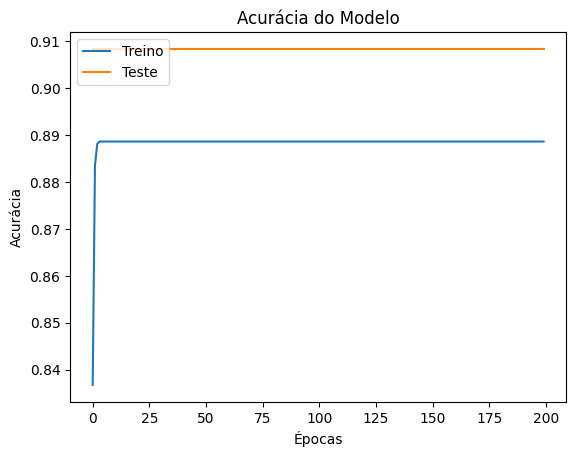

A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 57ms/step
Sequência: [1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 17, 18, 19, 24, 25] - Probabilidade: 92.69%
1/1 [==============================] - 0s 54ms/step
Sequência: [1, 2, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 19, 23, 25] - Probabilidade: 99.39%
1/1 [==============================] - 0s 49ms/step
Sequência: [1, 4, 5, 8, 9, 10, 11, 13, 16, 18, 20, 21, 22, 23, 25] - Probabilidade: 85.79%
1/1 [==============================] - 0s 49ms/step
Sequência: [1, 2, 4, 5, 6, 7, 8, 9, 10, 15, 16, 19, 21, 22, 23] - Probabilidade: 97.37%
1/1 [==============================] - 0s 41ms/step
Sequência: [2, 6, 9, 10, 11, 12, 13, 16, 18, 20, 21, 22, 23, 24, 25] - Probabilidade: 99.30%
1/1 [==============================] - 0s 41ms/step
Sequência: [1, 3, 7, 10, 11, 12, 15, 16, 17, 18, 20, 21, 22, 24, 25] - Probabilidade: 99.59%
1/1 [==============================] - 0s 46ms/step
Sequência: [1, 2, 4, 6, 7, 8, 11, 

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.optimizers import RMSprop


# Selecionar as colunas relevantes para o modelo
df_nn = df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6', 'Bola7', 'Bola8', 'Bola9', 'Bola10',
                  'Bola11', 'Bola12', 'Bola13', 'Bola14', 'Bola15', 'Ganhadores 15 acertos']]

# Ajustar o nome das colunas
df_nn.columns = map(str.lower, df_nn.columns)

# Tratar os casos de múltiplos ganhadores
df_nn.loc[df_nn['ganhadores 15 acertos'] > 0, 'ganhadores 15 acertos'] = 1

# Dividir o dataset em features e target
features = df_nn.iloc[:, 0:15]
target = df_nn.iloc[:, 15]

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=8)

# Criar o modelo
modelo = Sequential()
modelo.add(Dense(64, input_dim=15, activation='relu'))
modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.4))
modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.4))
modelo.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
modelo.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

# Treinar o modelo
history = modelo.fit(X_train, y_train, epochs=200, batch_size=31, validation_data=(X_test, y_test))

# Avaliar o modelo
y_pred_prob = modelo.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo: %.2f%%" % (accuracy * 100))

# Plotar a acurácia durante o treinamento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

# Gerar sequências de números com alta probabilidade
probabilidade_boa = 100
probabilidade_atual = 0

while probabilidade_atual < probabilidade_boa:
    sequencia = random.sample(range(1, 26), 15)
    probabilidade_atual = modelo.predict([sequencia])[0][0] * 100
    sequencia.sort()
    print(f"Sequência: {sequencia} - Probabilidade: {probabilidade_atual:.2f}%")
